In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.preprocessing import sequence
from keras.layers import Input, LSTM, Bidirectional, Dense, Embedding

DATA INFORMATION
* Watching various movie seen
* Three label of data( positive,neutral,negative)
* data are collecting from kaggle

In [5]:
data= pd.read_csv('/content/sample_data/emotions.csv')

In [6]:
data.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [7]:
data.shape

(2132, 2549)

DATA PREPROCESSING

## CLASS Distribution

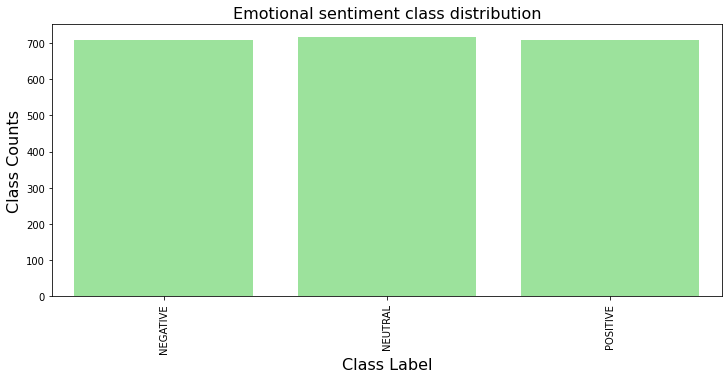

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x=data.label, color='lightgreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

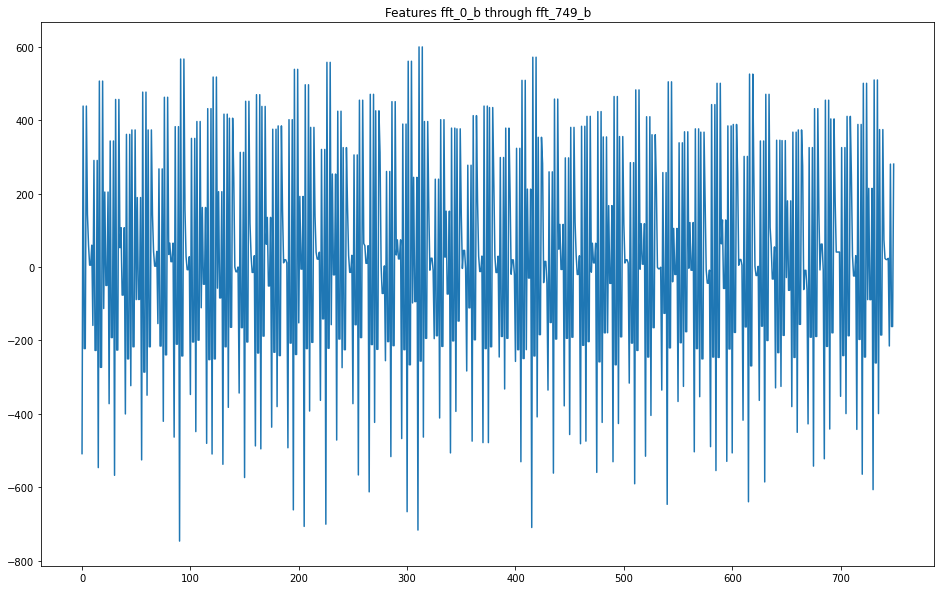

In [9]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [10]:
correlations = data.corr(method='pearson')
correlations

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,0.268983,0.153244,0.674195,0.103294,-0.039620,0.024944,-0.043387,0.098389,-0.022019,-0.003329,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,-0.220566,-0.096173,-0.728296,-0.061376,0.056452,0.002976,-0.001477,-0.061713,0.005671,-0.005395,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [11]:
# cheeking for imbalance dataset
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [12]:
#data.label
label_df = data['label']
label_df

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
# neural model cannot work on string data then mapping is needed

In [15]:
def Transform_data(data):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [16]:
#Calling above function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [17]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [18]:
#checking shape of dataset
x_train.shape[1]

2548

In [19]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [20]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

**MODEL BUILDING**
* DUE to time series data RNN used

In [21]:
#inputs = tf.keras.Input(shape=(X_train.shape[1],))
# GRU needs a 3D data for expanding this expand_dims  is also used
#expand_dims = tf.expand_dims(inputs, axis=2)
# instead of using dense layer GRU is used for propagation
# GRU is also similar of LSTM
#gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
# return sequence true means it provide more 2D data in array
#flatten = tf.keras.layers.Flatten()(gru)
# flatten is used for 2D array to 1D array
#outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
# GRU needs a 3D data for expanding this Dense layer is also used

#model = tf.keras.Model(inputs=inputs, outputs=outputs)
#print(model.summary())

In [22]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)
    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [23]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10,batch_size = 32,verbose = 1, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
48/48 [============================

In [24]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 18.387484550476074 
Accuracy on Training: 94.14519667625427


In [25]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

14/14 [==============================] - 1s 43ms/step


In [26]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [28]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [29]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])

Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[143  10   0]
 [  0 140   2]
 [  0  13 119]]


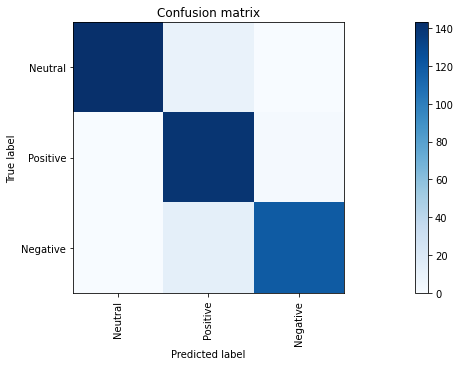

In [30]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

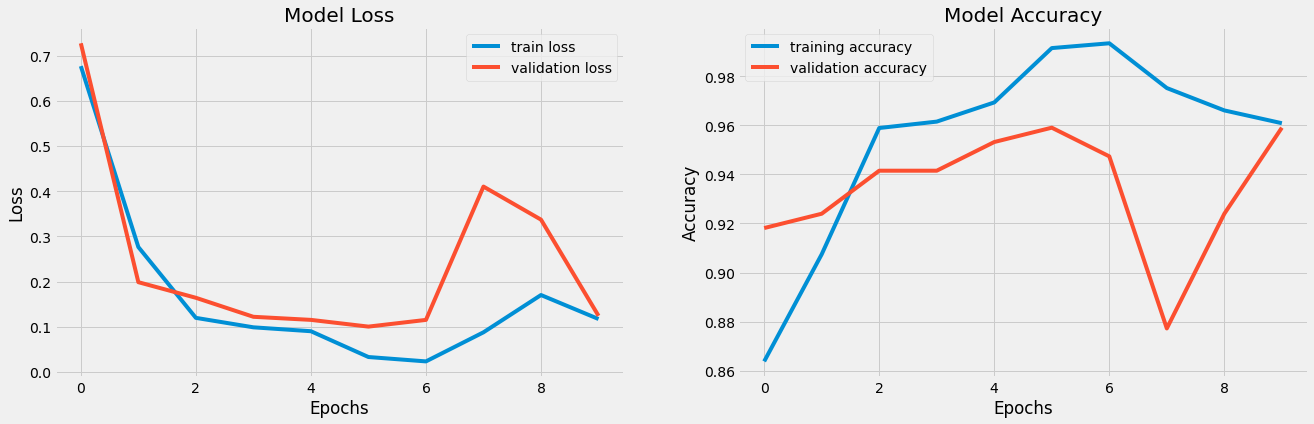

In [31]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [32]:
import seaborn as sn

**Random forest** 

In [33]:
#NAves Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427



In [34]:
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [35]:
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.98      0.94      0.96       142
           2       0.96      0.99      0.98       132

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



In [36]:
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)


*		Classification Report Deccsion Tree:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.94      0.94      0.94       142
           2       0.94      0.95      0.95       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [44]:

from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.layers import Conv2D,MaxPooling2D

In [38]:
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding

In [55]:
def lstm_cnn():
  inputs = Input(shape=(x_train.shape[1],))
  expand_dim =tf.expand_dims(inputs,axis =2)
  LSTM_Layer =(LSTM(64,return_sequences=True))(expand_dim)
  conv1 = Conv1D(64,2,activation='relu')(LSTM_Layer)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  dense_layer_1 = Dense(3, activation='softmax')(flat)
  cnn_lstm_model = tf.keras.Model(inputs=inputs, outputs=dense_layer_1)
  return cnn_lstm_model
  

In [52]:
# call the model
lstm_cnn_model = lstm_cnn()

lstm_cnn_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_6 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 2548, 64)          16896     
                                                                 
 conv1d_4 (Conv1D)           (None, 2547, 32)          4128      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1273, 32)         0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 40736)             0   

In [73]:
#cretaing model
lstm_cnn_model =lstm_cnn()
#Compiling model 
lstm_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
#Training and Evaluting model
history = lstm_cnn_model.fit(x_train, y_train, epochs = 10,batch_size = 32,verbose = 1, validation_split=0.1)
loss, acc = lstm_cnn_model.evaluate(x_test, y_test)
lstm_cnn_pred  = lstm_cnn_model.predict(x_test)

Epoch 1/10
48/48 [==============================] - 4s 81ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1179 - val_accuracy: 0.9708
Epoch 2/10
48/48 [==============================] - 4s 76ms/step - loss: 7.7766e-04 - accuracy: 1.0000 - val_loss: 0.1329 - val_accuracy: 0.9649
Epoch 3/10
48/48 [==============================] - 4s 74ms/step - loss: 5.3561e-04 - accuracy: 1.0000 - val_loss: 0.1278 - val_accuracy: 0.9649
Epoch 4/10
48/48 [==============================] - 4s 74ms/step - loss: 4.8074e-04 - accuracy: 1.0000 - val_loss: 0.1344 - val_accuracy: 0.9649
Epoch 5/10
48/48 [==============================] - 4s 84ms/step - loss: 3.7566e-04 - accuracy: 1.0000 - val_loss: 0.1316 - val_accuracy: 0.9591
Epoch 6/10
48/48 [==============================] - 4s 73ms/step - loss: 3.6596e-04 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9649
Epoch 7/10
48/48 [==============================] - 4s 77ms/step - loss: 2.7722e-04 - accuracy: 1.0000 - val_loss: 0.1426 - val_accura

In [69]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 13.192559778690338 
Accuracy on Training: 97.6580798625946


In [70]:
pred1 = np.argmax(lstm_cnn_pred,axis=1)
y_test1 =   np.argmax(y_test,axis=1)

In [71]:
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred1))


*		Classification Report Deccsion Tree:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.97      0.96      0.96       142
           2       0.96      0.98      0.97       132

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



Confusion matrix, without normalization
[[151   2   0]
 [  1 136   5]
 [  0   2 130]]


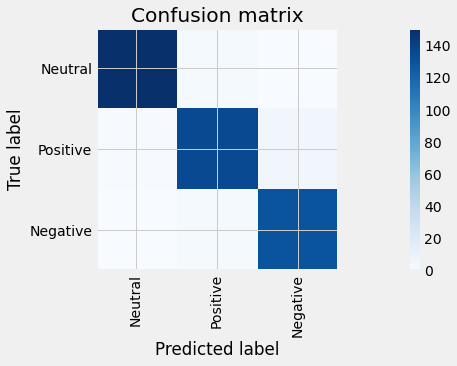

In [72]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

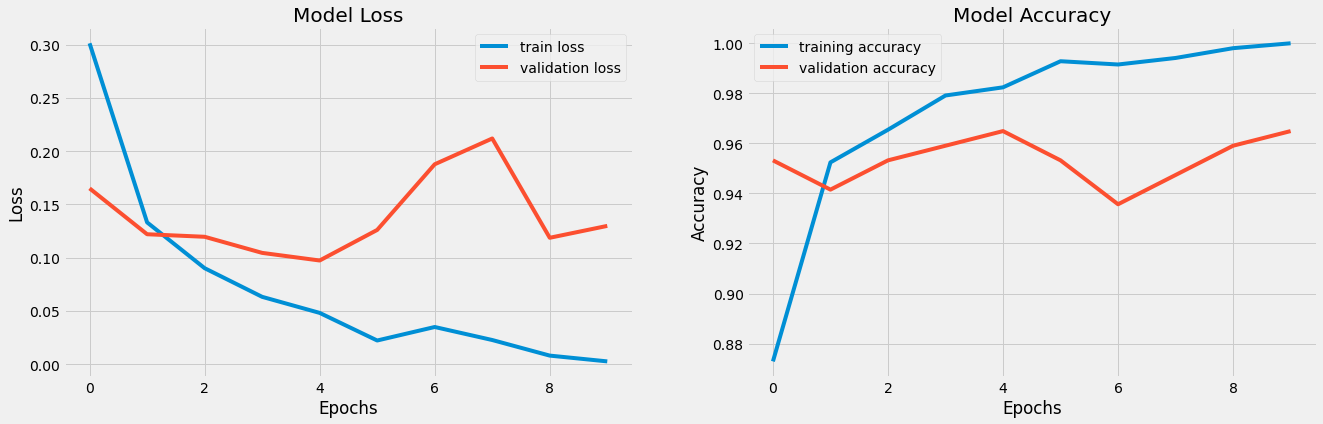

In [62]:
#Plotting Graph of Lstm+cnn model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [63]:

from sklearn.metrics import roc_curve, roc_auc_score